In [5]:
!pip install pandas
!pip install transformers
!pip install -U scikit-learn 
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [37]:
import pandas as pd
data = pd.read_json("bert_combined_train.jsonl",lines=True) 
data_test = pd.read_json("bert_combined_test.jsonl",lines=True)

In [50]:
main_df = pd.read_csv("main.csv")  
main_df = main_df.iloc[:, 1:] 
main_df = main_df[:30]
label_mapping = {"SUPPORTS": 0, "REFUTES": 1, "NOT ENOUGH INFO": 2}
main_df['label'] = main_df['label'].map(label_mapping)
main_df.dtypes

claim                object
combined_evidence    object
label                 int64
top_sentences        object
dtype: object

In [51]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_top_sentences(row):
    # Extract the query sentence and evidence sentences from the row
    query_sentence = row["claim"]
    sentences = row["combined_evidence"]
    
    # Tokenize query sentence and other sentences
    query_tokens = tokenizer.encode(query_sentence, add_special_tokens=True, return_tensors='pt')
    sentence_tokens = [tokenizer.encode(sentence, add_special_tokens=True, return_tensors='pt') for sentence in sentences]

    # Obtain BERT embeddings
    with torch.no_grad():
        query_outputs = model(query_tokens)[0][:, 0, :]  # Extract embeddings for the [CLS] token
        sentence_outputs = [model(tokens)[0][:, 0, :] for tokens in sentence_tokens]

    # Calculate cosine similarity between query and sentences
    similarities = [cosine_similarity(query_outputs.numpy(), sentence_output.numpy())[0][0] for sentence_output in sentence_outputs]

    # Rank sentences based on similarity scores
    ranked_sentences = sorted(zip(sentences, similarities), key=lambda x: x[1], reverse=True)

    # Define the number of top sentences to choose
    top_n = 3

    # Select the top N sentences from the ranked list
    top_sentences = ranked_sentences[:top_n]

    # Return the top N sentences
    return [sentence for sentence, _ in top_sentences]

# Apply the function to each row in the DataFrame
main_df['top_sentences'] = main_df.apply(get_top_sentences, axis=1)

In [40]:
print(len(data))
data = data.sample(frac=0.5, random_state=42)
print(len(data))

32179
16090


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens 

Epoch 1/5: Avg. Training Loss: 0.4811, Training Accuracy: 0.8167, Training Precision: 0.8166, Training Recall: 0.8167, Training F1: 0.8131, Validation Accuracy: 0.8763, Validation Precision: 0.8808, Validation Recall: 0.8763, Validation F1: 0.8743


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Epoch 2/5: Avg. Training Loss: 0.2016, Training Accuracy: 0.9360, Training Precision: 0.9359, Training Recall: 0.9360, Training F1: 0.9359, Validation Accuracy: 0.9043, Validation Precision: 0.9043, Validation Recall: 0.9043, Validation F1: 0.9033


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Epoch 3/5: Avg. Training Loss: 0.1091, Training Accuracy: 0.9658, Training Precision: 0.9658, Training Recall: 0.9658, Training F1: 0.9658, Validation Accuracy: 0.8999, Validation Precision: 0.9023, Validation Recall: 0.8999, Validation F1: 0.8993


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Epoch 4/5: Avg. Training Loss: 0.0721, Training Accuracy: 0.9772, Training Precision: 0.9772, Training Recall: 0.9772, Training F1: 0.9772, Validation Accuracy: 0.9074, Validation Precision: 0.9090, Validation Recall: 0.9074, Validation F1: 0.9068


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Epoch 5/5: Avg. Training Loss: 0.0546, Training Accuracy: 0.9836, Training Precision: 0.9836, Training Recall: 0.9836, Training F1: 0.9836, Validation Accuracy: 0.9096, Validation Precision: 0.9100, Validation Recall: 0.9096, Validation F1: 0.9091


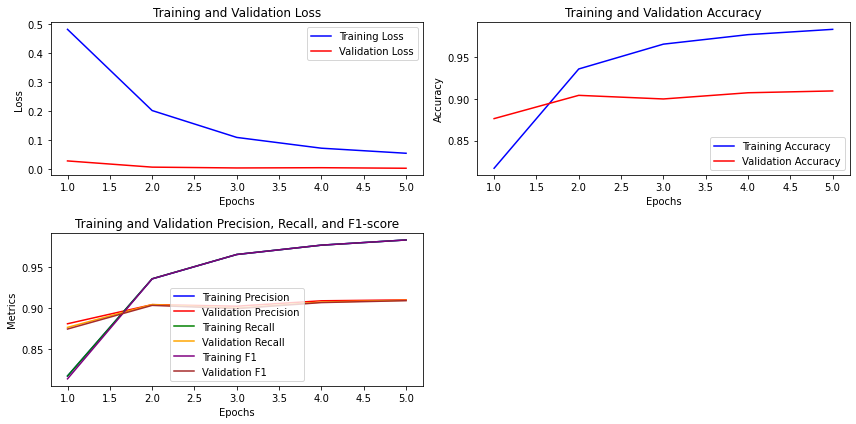

In [18]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Load your training dataset
training_data = data

# Split the dataset into training and validation sets
train_data, val_data = train_test_split(training_data, test_size=0.2, random_state=42)

# Define a custom dataset
class ClaimEvidenceDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        claim = str(self.data.iloc[idx]['claim'])
        evidence = str(self.data.iloc[idx]['evidence'])
        label = int(self.data.iloc[idx]['label'])

        inputs = self.tokenizer.encode_plus(
            claim,
            evidence,
            add_special_tokens=True,
            max_length=self.max_length,
            truncation=True,
            padding="max_length",
            return_tensors="pt"
        )

        return {
            "input_ids": inputs["input_ids"].flatten(),
            "attention_mask": inputs["attention_mask"].flatten(),
            "label": torch.tensor(label, dtype=torch.long)
        }

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)  # 3 labels: refutes, supported, not enough info

# Define training parameters
batch_size = 8
max_length = 128
epochs = 5
learning_rate = 2e-5

# Prepare datasets and data loaders
train_dataset = ClaimEvidenceDataset(train_data, tokenizer, max_length)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = ClaimEvidenceDataset(val_data, tokenizer, max_length)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Set optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Lists to store metrics for plotting
train_losses = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []

val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1s = []

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0
    train_preds = []
    train_labels = []
    for batch in train_loader:
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        train_labels.extend(labels.tolist())
        train_preds.extend(torch.argmax(outputs.logits, dim=1).tolist())

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = accuracy_score(train_labels, train_preds)
    train_precision = precision_score(train_labels, train_preds, average='weighted')
    train_recall = recall_score(train_labels, train_preds, average='weighted')
    train_f1 = f1_score(train_labels, train_preds, average='weighted')

    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1s.append(train_f1)

    # Validation loop
    model.eval()
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"]
            attention_mask = batch["attention_mask"]
            labels = batch["label"]

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            val_preds.extend(preds.tolist())
            val_labels.extend(labels.tolist())

    val_loss = criterion(logits, labels)
    val_accuracy = accuracy_score(val_labels, val_preds)
    val_precision = precision_score(val_labels, val_preds, average='weighted')
    val_recall = recall_score(val_labels, val_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')

    val_losses.append(val_loss.item())
    val_accuracies.append(val_accuracy)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1s.append(val_f1)

    print(f"Epoch {epoch+1}/{epochs}: Avg. Training Loss: {avg_train_loss:.4f}, "
          f"Training Accuracy: {train_accuracy:.4f}, "
          f"Training Precision: {train_precision:.4f}, "
          f"Training Recall: {train_recall:.4f}, "
          f"Training F1: {train_f1:.4f}, "
          f"Validation Accuracy: {val_accuracy:.4f}, "
          f"Validation Precision: {val_precision:.4f}, "
          f"Validation Recall: {val_recall:.4f}, "
          f"Validation F1: {val_f1:.4f}")

# Plotting training and validation metrics
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(2, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(2, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Precision, Recall, and F1 plot
plt.subplot(2, 2, 3)
plt.plot(range(1, epochs + 1), train_precisions, label='Training Precision', color='blue')
plt.plot(range(1, epochs + 1), val_precisions, label='Validation Precision', color='red')
plt.plot(range(1, epochs + 1), train_recalls, label='Training Recall', color='green')
plt.plot(range(1, epochs + 1), val_recalls, label='Validation Recall', color='orange')
plt.plot(range(1, epochs + 1), train_f1s, label='Training F1', color='purple')
plt.plot(range(1, epochs + 1), val_f1s, label='Validation F1', color='brown')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Precision, Recall, and F1-score')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
torch.save(model, "bert_sequence_classification_model.pth", pickle_protocol=4)


In [25]:
test_data = data_test

# Define a custom dataset for testing
class TestDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        claim = str(self.data.iloc[idx]['claim'])
        evidence = str(self.data.iloc[idx]['evidence'])
        label = int(self.data.iloc[idx]['label'])

        inputs = self.tokenizer.encode_plus(
            claim,
            evidence,
            add_special_tokens=True,
            max_length=self.max_length,
            truncation=True,
            padding="max_length",
            return_tensors="pt"
        )

        return {
            "input_ids": inputs["input_ids"].flatten(),
            "attention_mask": inputs["attention_mask"].flatten(),
            "label": torch.tensor(label, dtype=torch.long)
        }

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)  # Assuming you trained with 3 labels

# Load the trained model weights
# model.load_state_dict(torch.load("bert_claim_verification_model.pth"))
model.eval()

# Define testing parameters
batch_size = 8
max_length = 128

# Prepare test dataset and data loader
test_dataset = TestDataset(test_data, tokenizer, max_length)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Testing loop
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        true_labels.extend(labels.tolist())
        predicted_labels.extend(preds.tolist())

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens 

Test Accuracy: 0.3975
Test Precision: 0.3035
Test Recall: 0.3975
Test F1-score: 0.3305


In [52]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define a custom dataset for testing
class TestDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        claim = self.data.iloc[idx]['claim']
        top_sentences = self.data.iloc[idx]['top_sentences']  # Assuming top sentences are stored in a column named 'top_sentences'

        # Combine claim and top sentences into a single string
        claim_sentences = ' '.join([claim] + top_sentences)

        inputs = self.tokenizer.encode_plus(
            claim_sentences,
            add_special_tokens=True,
            max_length=self.max_length,
            truncation=True,
            padding="max_length",
            return_tensors="pt"
        )

        return {
            "input_ids": inputs["input_ids"].flatten(),
            "attention_mask": inputs["attention_mask"].flatten()
        }

# Load your trained model weights
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)  # Assuming you trained with 3 labels
# model.load_state_dict(torch.load("bert_claim_verification_model.pth"))
model.eval()

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load your test dataset
test_data = main_df  

# Define testing parameters
batch_size = 8
max_length = 128

# Prepare test dataset and data loader
test_dataset = TestDataset(test_data, tokenizer, max_length)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Lists to store predicted labels
predicted_labels = []

# Testing loop
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        predicted_labels.extend(preds.tolist())

# Print the predicted labels
print(predicted_labels)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]


In [54]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define a custom dataset for testing
class ClaimDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        claim = self.data.iloc[idx]['claim']
        top_sentences = self.data.iloc[idx]['top_sentences']  # Assuming top sentences are stored in a column named 'top_sentences'

        # Combine claim and top sentences into a single string
        claim_sentences = ' '.join([claim] + top_sentences)

        inputs = self.tokenizer.encode_plus(
            claim_sentences,
            add_special_tokens=True,
            max_length=self.max_length,
            truncation=True,
            padding="max_length",
            return_tensors="pt"
        )

        return {
            "input_ids": inputs["input_ids"].flatten(),
            "attention_mask": inputs["attention_mask"].flatten()
        }

# Load your trained model weights
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)  # Assuming you trained with 3 labels
# model.load_state_dict(torch.load("bert_claim_verification_model.pth"))
model.eval()

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load your test dataset
test_data = main_df  

# Define testing parameters
batch_size = 8
max_length = 128

# Prepare test dataset and data loader
test_dataset = ClaimDataset(test_data, tokenizer, max_length)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# True labels for the test dataset (assuming labels are stored in a column named 'label')
true_labels = test_data['label'].tolist()

# Lists to store predicted labels
predicted_labels = []

# Testing loop
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        predicted_labels.extend(preds.tolist())

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.42857142857142855
Precision: 0.18367346938775508
Recall: 0.42857142857142855
F1-score: 0.2571428571428571


/home/stud/giris1/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
